# Bloom Filters

## Task 1
***Give an overview of the types of operations that a Bloom filter supports, and where Bloom filters might be useful.***

Bloom filter is a probabilistic data structure that is used to test whether an element is in the hash table.

Operations that Bloom filter supports:
1. ***Element look-up***<br/>
    **a.** If the searched element is **not** in the list, the filter will return the definite answer. The look-up complexity is always $O(1)$, which is much faster than an unsuccessful check of an element in open-addressing $O(\frac{1}{1 - \alpha})$ or chained hash tables $O(1 + \alpha)$ where $\alpha$ is the load factor (number of elements expected to be inserted or are already in the list and the number of cells in the hash table.<br/>
    **b.** If element is in the list, we might encounter false positives when the filter thinks the element is there but actually its hash footprint is created by other elements. Runtime still always take constant time.<br/>

2. ***Insertion***<br/>
    **a.** An incoming element is hashed using k hash functions. Then we perform [1 **OR** with the values in the positions of the values the hash functions produced for the element]. <br/>
    
3. ***Deletion***<br/>
    **a.** Original Bloom filter does not support deletion but we can enable deletion by adding counting at each hash table cell. Instead of storing 0 or 1 bits, we can make it a byte-array and add 1 every time the hash produces the cell position as value. 
    
    
    
Bloom filters are an efficient way to filter queries when accessing information in large hash tables. For example, a website that stores logins of users could run the user's input login through a Bloom filter to determine whether such user even exists in a very short time. If it does not, we can return an error in a constant time because we don't have a load factor that would affect the lookup time. If the element probably exist, then it is worth spending time to search for it in the actual hash table and check the password it comes with.<br/>
   
## Task 2
***Implement a Bloom filter.***

In [1]:
from random import randint, seed
import math

class BloomFilter:
# Private instances
    __hash_params = []
    __elem_cnt = 0
    __bit_cnt = 0
    __seed = None
    
    '''
    Generate parameters for hash functions
    '''
    def __generate_hash_f(self):
        # seed to prevent bloom filter object from changing sets of hash functions during re-runs
        if self.__seed != None:
            seed(self.__seed)
        else:
            seed(0)
            
        self.__generate_large_prime_num()
        p = self.__prime_base
        self.__hash_params = []
        
        # generating parameters for universal hashing
        for i in range(self.__num_hash_f):
            self.__hash_params.append((randint(1, p - 1), randint(0, p - 1)))
    
    '''
    Hash the input using generated hash functions
    '''
    def __hash(self, elem):
        hash_vals = list()
        p = self.__prime_base
        
        # rewriting parameters into a function-member of universal hashing functions
        for params in self.__hash_params:
            (a, b) = params
            hash_value = ((a * elem + b) % p) % self.__arr_cp
            hash_vals.append(hash_value)
        
        return hash_vals
    
    '''
    Boring way to get a large prime number for universal hashing
    '''
    def __generate_large_prime_num(self):
        self.__prime_base = 274876858367 # (This number is stolen from Wikipedia)
        # But I will learn how to generate big prime numbers the proper way, hopefully...
    
    
# Formatting
    def __str__(self):
        out = '\n\033[1mBitmap\033[0m\n' # bold title
        out += ' '.join(map(lambda x: str(x), self.__hash_map)) # bit-array
        out += '\n\033[1mSome statistics\033[0m'
        out += '\nBitmap capacity: ' + str(self.__arr_cp)
        out += '\nHash functions used: ' + str(self.__num_hash_f)
        out += '\nBit count: ' + str(self.__bit_cnt)
        out += '\nElement count: ' + str(self.__elem_cnt) + '\n'
        return out
    
        
# Public instances
    '''
    Initialization of filter with required bit-array size and optional other parameters
    '''
    def __init__(self, arr_cp, fp_rate=0.01, num_hash_f=0, rand_seed=None):
        self.__arr_cp = arr_cp
        self.__hash_map = [0] * arr_cp
        
        if num_hash_f != 0:
            self.__num_hash_f = num_hash_f
        else:
            # derived formula for optimal num. of hash functions
            self.__num_hash_f = math.ceil(-math.log(fp_rate))
        
        # seed to let different filters create different hashing patterns
        if rand_seed != None:
            self.__seed = rand_seed
        self.__generate_hash_f()
    
    '''
    Element insertion
    '''
    def add(self, elem):
        # if element is in list, we are not inserting
        if not self.search(elem):
            # changing bits to 1 at positions of hash returns
            for idx in self.__hash(elem):
                self.__hash_map[idx] = 1
            self.__elem_cnt += 1
            self.__bit_cnt = sum(self.__hash_map)
    
    '''
    Element look-up
    '''
    def search(self, elem):
        maybe_in_list = True
        for idx in self.__hash(elem):
            if self.__hash_map[idx] != 1:
                maybe_in_list = False
                
        return maybe_in_list

### Reference

**Containers**:
- hash_params - tuples of a and b coefficients for universal hash functions
- hash_map - byte-array storing the key counters

**Size**:
- arr_cp - capacity of the hash table
- arr_sz - current load level (number of inserted elements)
- num_hash_f - number of hash functions

**Counters**:
- elem_cnt - count of inserted elements to resize when overfilled
- bit_cnt - count of number of bits in the hash map

**Constants**:
- prime_base - the value of p for transforming $U \to Z_p \to Z_{arr\_cp}$

**Misc**:
- seed - seed to independently generate hash functions

### Test code

In [2]:
bloom_filter = BloomFilter(arr_cp=100)
bloom_filter.add(56)
bloom_filter.add(54)
bloom_filter.add(71)
bloom_filter.add(91)
bloom_filter.add(82)
bloom_filter.add(49)
bloom_filter.add(82)
print(bloom_filter)

bloom_filter_2 = BloomFilter(arr_cp=100)
bloom_filter_2.add(49)
print(bloom_filter_2.search(49))


Bitmap
0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0
Some statistics
Bitmap capacity: 100
Hash functions used: 5
Bit count: 28
Element count: 6

True


## Task 3
***Give a description of the hash functions that your implementation uses.***

I generate hash functions from the universal set of hash functions to ensure that they will generate values uniformly on a restricted domain. This would mean that for two different values $x, y ∈ U, x \neq y$, the probability that $h(x) = h(y) ∈ Z_{arr\_cp}$ would be less or equal to $\frac{1}{arr\_cp}$.

The reason I use a subset of universal hash functions is to reduce the rate of false positives by not "overfilling" some particular cells in the hash map. If we reuse the same set of cells too often, when we search for a new value, its hash will likely fall into those cells and return a false positive.

## Task 4
***Provide an analysis of how your implementation scales in terms of:***<br/>
Let's use the following notation:
- $k$ is the number of hash functions the Bloom filter uses
- $m$ is the total number of bits allocated to store the elements
- $n$ is the number of elements inserted into the hash table
- $p_{fp}$ is the probability of a false-positive lookup result
- $X$ is the number of bits set to one

    *1) memory size as a function of the false positive rate*<br/>
    Approximation of false positive rate:
    $$ (1 - e^{-\frac{kn}{m}})^k = p_{fp} $$
    $$ 1 - e^{-\frac{kn}{m}} = \sqrt[k]{p_{fp}} $$
    $$ (e^{-kn})^{1/m} = 1 - \sqrt[k]{p_{fp}} $$
    $$ \dfrac{1}{m} = log_{e^{-kn}}(1 - \sqrt[k]{p_{fp}}) $$
    $$ m = log_{1 - \sqrt[k]{p_{fp}}}(e^{-kn}) $$
    $$ m = log_{1 - \sqrt[⌈ln(p_{fp})⌉]{p_{fp}}}(e^{⌈ln(p_{fp})⌉n}) $$
    $$ m = \Theta(log_{1 - \sqrt[⌈ln(p_{fp})⌉]{p_{fp}}}(e^{n}logp_{fp})) $$
    
   *2) memory size as a function of the number of items stored*<br/>
    Using the formula for estimated number of inserted items derived in Swamidass & Baldi (2007):
    $$ n^* = -\dfrac{m}{k}ln(1 - \dfrac{X}{m}) $$
    $$ m = -\dfrac{kn^*}{ln(1 - \frac{X}{m})}  $$
    $$ m = \Theta(-\dfrac{kn^*}{ln(1 - \frac{X}{m})})  $$
    
   *3) access time as a function of the false positive rate*<br/>
   Access time depends on the number of hash function we use:
    $$ k = ⌈-ln(p_{fp})⌉ $$
    $$ k = \Theta(-logp_{fp}) $$
    
   *4) access time as a function of the number of items stored*<br/>
   Access time does not depend on the number of items stored because in any case we need to check $k$ cells.
    $$ k = \Theta(k + 0n) $$
    
## Task 5
***Produce a plot to show that your implementation’s false positive rate matches the theoretically expected rate.***

In [3]:
import time
from sys import stdout

### False positive rate and memory size
NUM_BL_FILT = 10 # use several bloom filters per capacity to reduce bias
MIN_ARR_CP = 20
MAX_ARR_CP = 2000
NUM_ELEM = 20
U = list(range(1000)) # universe of possible keys

'''
Bloom filters initialization
'''
print("\n\033[1mInitializing bloom filters\033[0m")
start = time.time()
num_cps = MAX_ARR_CP - MIN_ARR_CP + 1

# matrix of size num_capacities * NUM_BL_FILT * NUM_ELEM
# to store actual elements in the set
hash_map = [None] * num_cps

# matrix of size num_capacities * NUM_BL_FILT to store all bloom filters
bl_filts = [None] * num_cps

for row in range(num_cps):
    bl_filts[row] = []
    hash_map[row] = []
    for bl_id in range(NUM_BL_FILT):
        stdout.write("\rProgress: row = {0} out of {1}, creating filter bl_id = {2} out of {3}. Time elapsed: {4}s".format(row, num_cps - 1, bl_id, NUM_BL_FILT - 1, int(time.time() - start)))
        obj_init = BloomFilter(arr_cp=row + MIN_ARR_CP, rand_seed=bl_id) # create a new filter
        bl_filts[row].append(obj_init)
        hash_map[row].append(set())
        
stdout.write("\nDone!\n\n")    
        
'''
Random items insertion
'''
print("\033[1mFilling the bloom filters\033[0m")
start = time.time()

for row in range(num_cps):
    for bl_id in range(NUM_BL_FILT):
        stdout.write("\rProgress: row = {0} out of {1}, filling filter bl_id = {2} out of {3}. Time elapsed: {4}s".format(row, num_cps - 1, bl_id, NUM_BL_FILT - 1, int(time.time() - start)))
        for _ in range(NUM_ELEM):
            key_to_add = U[randint(1, len(U) - 1)] # getting a key from universe of keys
            bl_filts[row][bl_id].add(key_to_add)
            hash_map[row][bl_id].add(key_to_add)
stdout.write("\nDone!\n")    

'''
Items lookup false positives rate
'''
print("\n\033[1mPerforming lookup tests\033[0m")
start = time.time()
fp_per_cp = [0] * num_cps # array to store fp rates

for row in range(num_cps):
    row_fp_vals = []
    for bl_id in range(NUM_BL_FILT):
        fp_cnt = 0 # false positive count
        tn_cnt = 0 # true negative count
        stdout.write("\rProgress: row = {0} out of {1}, testing filter bl_id = {2} out of {3}. Time elapsed: {4}s".format(row, num_cps - 1, bl_id, NUM_BL_FILT - 1, int(time.time() - start)))
        
        for key in U:
            key_exists = key in hash_map[row][bl_id]
            bl_filt_pass = bl_filts[row][bl_id].search(key)
            
            if (not key_exists) and (not bl_filt_pass):
                tn_cnt += 1
            elif (not key_exists) and bl_filt_pass:
                fp_cnt += 1
        row_fp_vals.append(fp_cnt / (fp_cnt + tn_cnt))
        
    fp_per_cp[row] = sum(row_fp_vals) / len(row_fp_vals)
stdout.write("\nDone!\n")


Initializing bloom filters
Progress: row = 1980 out of 1980, creating filter bl_id = 9 out of 9. Time elapsed: 3s
Done!

Filling the bloom filters
Progress: row = 1980 out of 1980, filling filter bl_id = 9 out of 9. Time elapsed: 12s
Done!

Performing lookup tests
Progress: row = 1980 out of 1980, testing filter bl_id = 9 out of 9. Time elapsed: 87s
Done!


In [4]:
'''
Theoretical false positive rates using formula in 4.1
'''
arr_cps = range(MIN_ARR_CP, MIN_ARR_CP + num_cps)
k = math.ceil(-math.log(0.01)) # fixing the number of hash functions
fp_per_cp_theor = list(map(lambda arr_cp: (1 - math.e**(-k * NUM_ELEM / arr_cp))**k, arr_cps))

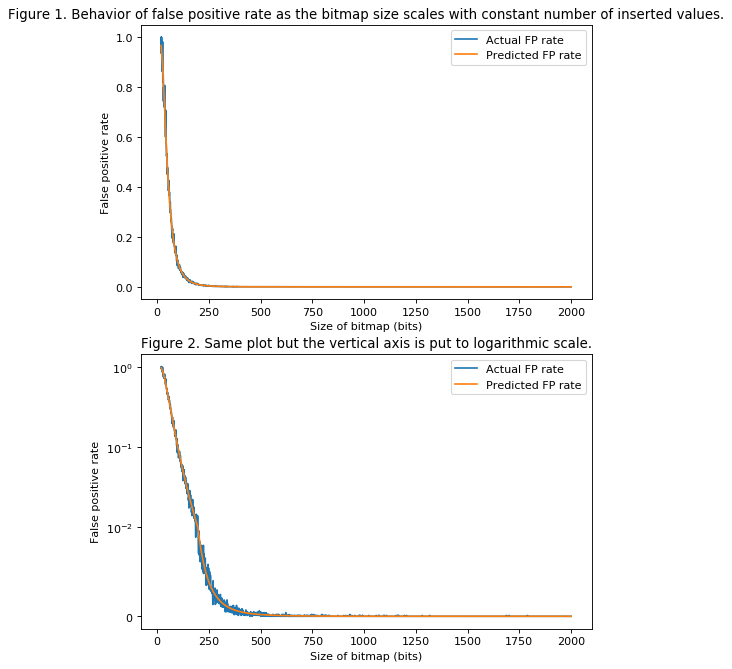

In [6]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k') # plot resize

'''
Top plot
'''
plt.subplot(221)
real, = plt.plot(arr_cps, fp_per_cp, label="Actual FP rate")
theor, = plt.plot(arr_cps, fp_per_cp_theor, label="Predicted FP rate")
plt.legend(handles=[real, theor])

plt.xlabel("Size of bitmap (bits)")
plt.ylabel("False positive rate")
plt.title("Figure 1. Behavior of false positive rate as the bitmap size scales with constant number of inserted values.")

'''
Bottom plot
'''
plt.subplot(223)
real, = plt.plot(arr_cps, fp_per_cp, label="Actual FP rate")
# real, = plt.plot(arr_cps, np.poly1d(np.polyfit(arr_cps, fp_per_cp, 10))(arr_cps), label="Actual FP rate")
theor, = plt.plot(arr_cps, fp_per_cp_theor, label="Predicted FP rate")
plt.yscale('symlog', linthreshy=0.01)
plt.legend(handles=[real, theor])

plt.xlabel("Size of bitmap (bits)")
plt.ylabel("False positive rate")
plt.title("Figure 2. Same plot but the vertical axis is put to logarithmic scale.")

plt.show()

### Digest
As we can see, generally the actual false positive rate rather closesly matches the theoretically expected one as we scale the number of bits in the hash map. This means that this bloom filter implementation has hash functions that are uniform and independent to achieve the chance of collision assumed in the false positive rate analysis.

## Appendix
***#simulation***: I tested the bloom filter for false positive rate by varying the bitmap size which affects it based on the formula, and for each size I generated a batch of bloom filters and utilized the regression to the mean quality of distributions of number of FPs within one size to reduce fluctuations in the graph.<br/>
***#sampling + #probability***: I generate universal hash functions from a wide range of possible outcomes ($(0.2*10^12)^2$, inside the bracket is the order of magnitude of the chosen number $p$, and we square this because we have two parameters $a, b$). This would ensure that the hashing of cells is uniform and reduce the number of collisions to ideal condition. I also make sure that the sampling process is uniform within the range of possible outcomes to diversify the hashing patterns (e.g. big and small steps).<br/>
***#organization***: I fragmentize my code into relevant sections by utilizing jupyter notebook cells, object-oriented programming, and comment sections to allow for the generalizability (e.g. modifiable number of hash functions) the ease of read.